In [18]:
import pandas as pd
import matplotlib.pyplot as plt

table = pd.read_csv('2017_jun_final.csv')

In [19]:
table.head()

,N,Посада,Мова програмування,Спеціалізація,Загальний досвід роботи,Досвід роботи на поточному місці,Зарплата на місяць,Зміна зарплати за 12 місяців,Місто,Розмір компанії,...,Ще студент,Рівень англійської,Предметна область,Дата заповнення,User.Agent,exp,current_job_exp,salary,Валюта,cls
0,1,Junior QA engineer,NaN,Manual QA,0.5,0.5,400,0,Харків,до 10 осіб,...,True,Pre-intermediate (нище середнього),"iOS,eCommerce",12/06/2017 12:38:08,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0.5,0.5,400,NaN,QA
1,2,Junior QA engineer,NaN,Manual QA,менше 3 місяців,менше 3 місяців,430,130,Харків,більше 1000 осіб,...,True,Upper-Intermediate (вище середнього),Веб-розробка,12/06/2017 12:42:51,Mozilla/5.0 (iPad; CPU OS 10_2_1 like Mac OS X...,0.0,0.0,430,NaN,QA
2,3,Software Engineer,C#/.NET,NaN,4,1,2500,800,Київ,до 1000 осіб,...,False,Intermediate (середній),"Веб-розробка,Корпоративні системи",12/06/2017 13:02:47,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,4.0,1.0,2500,NaN,DEV
3,4,Software Engineer,JavaScript,NaN,5,4,2000,400,Одеса,до 200 осіб,...,False,Pre-intermediate (нище середнього),"Desktop Applications,Веб-розробка",12/06/2017 13:03:01,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,5.0,4.0,2000,NaN,DEV
4,5,Senior Software Engineer,JavaScript,NaN,10 і більше років,0.5,4500,500,Інше,до 10 осіб,...,False,Intermediate (середній),"Desktop Applications,Веб-розробка",12/06/2017 13:03:47,Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_2 like...,10.0,0.5,4500,NaN,DEV


In [20]:
table.shape

(8704, 25)

In [21]:
table.dtypes

N                                     int64
Посада                               object
Мова програмування                   object
Спеціалізація                        object
Загальний досвід роботи              object
Досвід роботи на поточному місці     object
Зарплата на місяць                    int64
Зміна зарплати за 12 місяців          int64
Місто                                object
Розмір компанії                      object
Тип компанії                         object
Стать                                object
Вік                                   int64
Освіта                               object
Університет                          object
Ще студент                             bool
Рівень англійської                   object
Предметна область                    object
Дата заповнення                      object
User.Agent                           object
exp                                 float64
current_job_exp                     float64
salary                          

In [22]:
table.isnull().sum()

N                                      0
Посада                                 0
Мова програмування                  3850
Спеціалізація                       7219
Загальний досвід роботи                0
Досвід роботи на поточному місці       0
Зарплата на місяць                     0
Зміна зарплати за 12 місяців           0
Місто                                  0
Розмір компанії                        0
Тип компанії                           0
Стать                                  0
Вік                                    0
Освіта                                 0
Університет                          358
Ще студент                             0
Рівень англійської                     0
Предметна область                    223
Дата заповнення                        0
User.Agent                             0
exp                                    0
current_job_exp                        0
salary                                 0
Валюта                              8694
cls             

In [23]:
nan_columns = table.columns[table.isnull().any()]
non_prog_lang_columns = nan_columns.to_list()
non_prog_lang_columns.remove('Мова програмування')
table.drop(non_prog_lang_columns, axis=1, inplace=True)

In [24]:
table.isnull().sum()

N                                      0
Посада                                 0
Мова програмування                  3850
Загальний досвід роботи                0
Досвід роботи на поточному місці       0
Зарплата на місяць                     0
Зміна зарплати за 12 місяців           0
Місто                                  0
Розмір компанії                        0
Тип компанії                           0
Стать                                  0
Вік                                    0
Освіта                                 0
Ще студент                             0
Рівень англійської                     0
Дата заповнення                        0
User.Agent                             0
exp                                    0
current_job_exp                        0
salary                                 0
dtype: int64

In [25]:
table.dropna(inplace=True)

In [26]:
table.shape

(4854, 20)

In [27]:
python_data = table[table['Мова програмування'] == 'Python']

In [28]:
python_data.shape

(207, 20)

In [29]:
grouped_table_by_posada = table.groupby(by='Посада').apply(lambda x: x)

C:\Users\egork\AppData\Local\Temp\ipykernel_11348\2327351425.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped_table_by_posada = table.groupby(by='Посада').apply(lambda x: x)


In [30]:
grouped_table_by_posada['Зарплата на місяць'].agg(['min', 'max'])

min       75
max    18000
Name: Зарплата на місяць, dtype: int64

In [31]:
def fill_avg_salary(data):
    average = data['Зарплата на місяць'].mean()
    return average


print(fill_avg_salary(grouped_table_by_posada))

1883.371034198599


In [32]:
table['avg'] = table.groupby('Посада').apply(fill_avg_salary).reset_index(level=0, drop=True)

avg_an_stat = table['avg'].describe()
print(avg_an_stat)


avg_an_stat.to_csv('updated_data.csv', index=True)

count       6.000000
mean     2061.927753
std      1526.367589
min       457.000000
25%       873.901464
50%      1839.315037
75%      2932.400694
max      4387.076923
Name: avg, dtype: float64


C:\Users\egork\AppData\Local\Temp\ipykernel_11348\2993234799.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  table['avg'] = table.groupby('Посада').apply(fill_avg_salary).reset_index(level=0, drop=True)


C:\Users\egork\AppData\Local\Temp\ipykernel_11348\4202305126.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  table['avg'] = table.groupby('Посада').apply(fill_avg_salary).reset_index(level=0, drop=True)


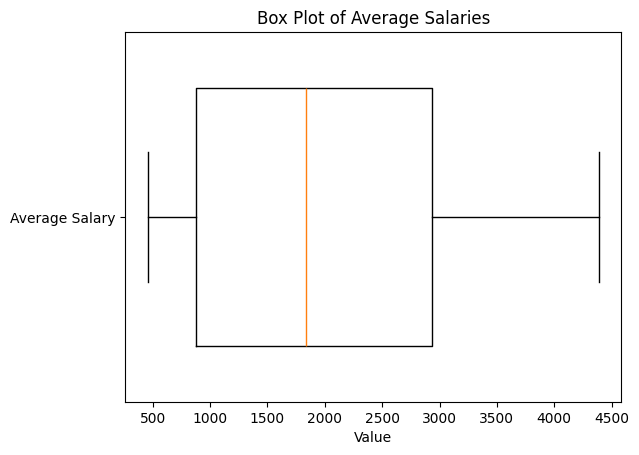

In [35]:
def fill_avg_salary(group):
    return group['Зарплата на місяць'].mean()

# Додавання стовпця 'avg' з середньою зарплатою для кожної посади
table['avg'] = table.groupby('Посада').apply(fill_avg_salary).reset_index(level=0, drop=True)

# Описова статистика для стовпця 'avg'
avg_an_stat = table['avg'].describe()

# Збереження статистичних даних у CSV файл
avg_an_stat.to_csv('updated_data.csv', index=True)

# Побудова box plot на основі статистичних даних
quartiles = [avg_an_stat['min'], avg_an_stat['25%'], avg_an_stat['50%'], avg_an_stat['75%'], avg_an_stat['max']]

fig, ax = plt.subplots()

ax.boxplot([quartiles], vert=False, widths=0.7)
ax.set_title('Box Plot of Average Salaries')
ax.set_yticklabels(['Average Salary'])
ax.set_xlabel('Value')

plt.show()